In [2]:
import gensim

C:\dev\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### Create the iterator that converts from csv to TaggedDocuments

In [23]:
class Sequences:
    def __init__(self, filename):
        self.filename = filename
        self.f = open(self.filename)
    
    # this function is called each epoch of gensim training
    def __iter__(self):
        self.f = open(self.filename)
        return self
    
    def __next__(self):
        line = next(self.f)
        # if line at end then restart?
        while 'HUMAN' not in line:            
            line = next(self.f)

        id,sequence = line.strip().split(',')
        sequence = sequence.split(' ')
        return gensim.models.doc2vec.TaggedDocument(tags=[id], words=sequence)

### Train the doc2Vec embeddings

In [24]:
sequences = Sequences('split_uniprot_sequences.dat')

doc2vec = gensim.models.Doc2Vec(
    documents=sequences,
    epochs=20,
    dm=0,
    vector_size=20,
    window=5,
    min_count=10
)

#### Most similar embedding to BMP2

In [35]:
doc2vec.docvecs.most_similar(positive=['BMP2_HUMAN']) #, negative=['BMP2K_HUMAN'])

C:\dev\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('RAX2_HUMAN', 0.7265111207962036),
 ('NKX21_HUMAN', 0.719907820224762),
 ('MSX2_HUMAN', 0.7114726901054382),
 ('FOS_HUMAN', 0.6970617771148682),
 ('MSX1_HUMAN', 0.682089626789093),
 ('CC062_HUMAN', 0.6732057332992554),
 ('CE024_HUMAN', 0.6627956628799438),
 ('TCF23_HUMAN', 0.6597541570663452),
 ('PHX2B_HUMAN', 0.6536805033683777),
 ('LC1L1_HUMAN', 0.631336510181427)]

### UMAP visualization

In [8]:
import umap

In [9]:
import numpy as np

In [26]:
ump = umap.UMAP(metric = 'cosine')
vecs = doc2vec.docvecs.vectors_docs_norm
samples = vecs[np.random.choice(vecs.shape[0], 1000, replace=False), :]
reduced = ump.fit_transform(samples)

In [ ]:
reduced

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

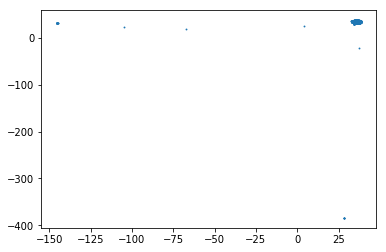

In [28]:
plt.scatter(
    reduced[:,0],
    reduced[:,1],
    marker = '.',
    s = 3
)

### TSNE visualization

In [29]:
from sklearn.manifold import TSNE

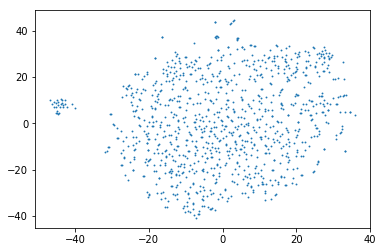

In [30]:
tsne = TSNE(metric='cosine')
reduced = tsne.fit_transform(samples)
plt.scatter(
    reduced[:,0],
    reduced[:,1],
    marker = '.',
    s = 3
)